<a href="https://colab.research.google.com/github/envirodatascience/final-project-go-squirrels/blob/main/Sophie's_Squirrel_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# This notebook will address the sub-question: Does the weather affect squirrels behaviors? Does the weather affect the number of squirrels observed on a day?

In [1]:
#Import packages

import pandas as pd
import numpy as np
import statsmodels.api as sm
import scipy.stats as stats
import plotnine
from plotnine import *
from plotnine import scales
import geopandas as gpd

# Import data and orient to data

In [2]:
# Read squirrel data
url = 'https://raw.githubusercontent.com/envirodatascience/final-project-go-squirrels/refs/heads/main/2018_Central_Park_Squirrel_Census_-_Squirrel_Data_20250408.csv'
df_sq_2018 = pd.read_csv(url)
df_sq_2018.head()

,X,Y,Unique Squirrel ID,Hectare,Shift,Date,Hectare Squirrel Number,Age,Primary Fur Color,Highlight Fur Color,...,Kuks,Quaas,Moans,Tail flags,Tail twitches,Approaches,Indifferent,Runs from,Other Interactions,Lat/Long
0,-73.956134,40.794082,37F-PM-1014-03,37F,PM,10142018,3,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,NaN,POINT (-73.9561344937861 40.7940823884086)
1,-73.968857,40.783783,21B-AM-1019-04,21B,AM,10192018,4,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,NaN,POINT (-73.9688574691102 40.7837825208444)
2,-73.974281,40.775534,11B-PM-1014-08,11B,PM,10142018,8,NaN,Gray,NaN,...,False,False,False,False,False,False,False,False,NaN,POINT (-73.97428114848522 40.775533619083)
3,-73.959641,40.790313,32E-PM-1017-14,32E,PM,10172018,14,Adult,Gray,NaN,...,False,False,False,False,False,False,False,True,NaN,POINT (-73.9596413903948 40.7903128889029)
4,-73.970268,40.776213,13E-AM-1017-05,13E,AM,10172018,5,Adult,Gray,Cinnamon,...,False,False,False,False,False,False,False,False,NaN,POINT (-73.9702676472613 40.7762126854894)


In [3]:
df_sq_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3023 entries, 0 to 3022
Data columns (total 31 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   X                                           3023 non-null   float64
 1   Y                                           3023 non-null   float64
 2   Unique Squirrel ID                          3023 non-null   object 
 3   Hectare                                     3023 non-null   object 
 4   Shift                                       3023 non-null   object 
 5   Date                                        3023 non-null   int64  
 6   Hectare Squirrel Number                     3023 non-null   int64  
 7   Age                                         2902 non-null   object 
 8   Primary Fur Color                           2968 non-null   object 
 9   Highlight Fur Color                         1937 non-null   object 
 10  Combination 

In [4]:
urlweather = 'https://raw.githubusercontent.com/envirodatascience/final-project-go-squirrels/refs/heads/main/Central_Park_Weather.csv'
df_weather = pd.read_csv(urlweather)
df_weather.head()

,Date,Temperature,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,HDD,CDD,Precipitation,New Snow,Snow Depth
0,NaN,Maximum,Minimum,Average,Departure,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-10-01,76,63,69.5,6.0,NaN,0,5,0.00,0.0,0
2,2018-10-02,77,65,71.0,7.9,NaN,0,6,0.69,0.0,0
3,2018-10-03,74,63,68.5,5.8,NaN,0,4,0.00,0.0,0
4,2018-10-04,76,61,68.5,6.2,NaN,0,4,0.04,0.0,0


In [5]:
df_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69 entries, 0 to 68
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           68 non-null     object 
 1   Temperature    69 non-null     object 
 2   Unnamed: 2     69 non-null     object 
 3   Unnamed: 3     69 non-null     object 
 4   Unnamed: 4     69 non-null     object 
 5   Unnamed: 5     0 non-null      float64
 6   HDD            68 non-null     object 
 7   CDD            68 non-null     object 
 8   Precipitation  68 non-null     object 
 9   New Snow       68 non-null     object 
 10  Snow Depth     68 non-null     object 
dtypes: float64(1), object(10)
memory usage: 6.1+ KB


# Clean Data

In [6]:
df_weather.rename(columns = {'Temperature':'Temp Max', 'Unnamed: 2':'Temp Min', 'Unnamed: 3':'Temp Avg', 'Unnamed: 4':'Temp Departure'}, inplace = True)
df_weather.head()

,Date,Temp Max,Temp Min,Temp Avg,Temp Departure,Unnamed: 5,HDD,CDD,Precipitation,New Snow,Snow Depth
0,NaN,Maximum,Minimum,Average,Departure,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-10-01,76,63,69.5,6.0,NaN,0,5,0.00,0.0,0
2,2018-10-02,77,65,71.0,7.9,NaN,0,6,0.69,0.0,0
3,2018-10-03,74,63,68.5,5.8,NaN,0,4,0.00,0.0,0
4,2018-10-04,76,61,68.5,6.2,NaN,0,4,0.04,0.0,0


In [7]:
df_weather = df_weather.drop('Unnamed: 5', axis=1) #This is a blank column that never contained any data
df_weather.head()

,Date,Temp Max,Temp Min,Temp Avg,Temp Departure,HDD,CDD,Precipitation,New Snow,Snow Depth
0,NaN,Maximum,Minimum,Average,Departure,NaN,NaN,NaN,NaN,NaN
1,2018-10-01,76,63,69.5,6.0,0,5,0.00,0.0,0
2,2018-10-02,77,65,71.0,7.9,0,6,0.69,0.0,0
3,2018-10-03,74,63,68.5,5.8,0,4,0.00,0.0,0
4,2018-10-04,76,61,68.5,6.2,0,4,0.04,0.0,0


In [8]:
df_weather = df_weather.drop(df_weather.index[0]) #drop row 0 because it was a multi-index column format and I adjusted column headings
df_weather.head()

,Date,Temp Max,Temp Min,Temp Avg,Temp Departure,HDD,CDD,Precipitation,New Snow,Snow Depth
1,2018-10-01,76,63,69.5,6.0,0,5,0.00,0.0,0
2,2018-10-02,77,65,71.0,7.9,0,6,0.69,0.0,0
3,2018-10-03,74,63,68.5,5.8,0,4,0.00,0.0,0
4,2018-10-04,76,61,68.5,6.2,0,4,0.04,0.0,0
5,2018-10-05,71,60,65.5,3.6,0,1,0.00,0.0,0


In [9]:
df_weather = df_weather.reset_index(drop=True) #reset index after dropping column and row

In [10]:
df_weather['Date'] = df_weather['Date'].astype(str) #converted to string so I can make the date formats match for merge

In [11]:
df_weather['Date'] = pd.to_datetime(df_weather['Date'], errors='coerce')
df_weather.head()

,Date,Temp Max,Temp Min,Temp Avg,Temp Departure,HDD,CDD,Precipitation,New Snow,Snow Depth
0,2018-10-01,76,63,69.5,6.0,0,5,0.00,0.0,0
1,2018-10-02,77,65,71.0,7.9,0,6,0.69,0.0,0
2,2018-10-03,74,63,68.5,5.8,0,4,0.00,0.0,0
3,2018-10-04,76,61,68.5,6.2,0,4,0.04,0.0,0
4,2018-10-05,71,60,65.5,3.6,0,1,0.00,0.0,0


In [12]:
df_sq_2018['Date'] = df_sq_2018['Date'].astype(str) #converted to string so I can make the date format match the weather df

In [13]:
def format_date(date_str):
    if len(date_str) == 7:  # For dates like 1062018 (single-digit month)
        return date_str[:1] + '/' + date_str[1:3] + '/' + date_str[3:]
    elif len(date_str) == 8:  # For dates like 10142018 (double-digit month)
        return date_str[:2] + '/' + date_str[2:4] + '/' + date_str[4:]
df_sq_2018['Date'] = df_sq_2018['Date'].apply(format_date)
df_sq_2018.head()

,X,Y,Unique Squirrel ID,Hectare,Shift,Date,Hectare Squirrel Number,Age,Primary Fur Color,Highlight Fur Color,...,Kuks,Quaas,Moans,Tail flags,Tail twitches,Approaches,Indifferent,Runs from,Other Interactions,Lat/Long
0,-73.956134,40.794082,37F-PM-1014-03,37F,PM,10/14/2018,3,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,NaN,POINT (-73.9561344937861 40.7940823884086)
1,-73.968857,40.783783,21B-AM-1019-04,21B,AM,10/19/2018,4,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,NaN,POINT (-73.9688574691102 40.7837825208444)
2,-73.974281,40.775534,11B-PM-1014-08,11B,PM,10/14/2018,8,NaN,Gray,NaN,...,False,False,False,False,False,False,False,False,NaN,POINT (-73.97428114848522 40.775533619083)
3,-73.959641,40.790313,32E-PM-1017-14,32E,PM,10/17/2018,14,Adult,Gray,NaN,...,False,False,False,False,False,False,False,True,NaN,POINT (-73.9596413903948 40.7903128889029)
4,-73.970268,40.776213,13E-AM-1017-05,13E,AM,10/17/2018,5,Adult,Gray,Cinnamon,...,False,False,False,False,False,False,False,False,NaN,POINT (-73.9702676472613 40.7762126854894)


In [14]:
# Convert the 'Date' column to datetime objects
df_sq_2018['Date'] = pd.to_datetime(df_sq_2018['Date'])
df_sq_2018.head()

,X,Y,Unique Squirrel ID,Hectare,Shift,Date,Hectare Squirrel Number,Age,Primary Fur Color,Highlight Fur Color,...,Kuks,Quaas,Moans,Tail flags,Tail twitches,Approaches,Indifferent,Runs from,Other Interactions,Lat/Long
0,-73.956134,40.794082,37F-PM-1014-03,37F,PM,2018-10-14,3,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,NaN,POINT (-73.9561344937861 40.7940823884086)
1,-73.968857,40.783783,21B-AM-1019-04,21B,AM,2018-10-19,4,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,NaN,POINT (-73.9688574691102 40.7837825208444)
2,-73.974281,40.775534,11B-PM-1014-08,11B,PM,2018-10-14,8,NaN,Gray,NaN,...,False,False,False,False,False,False,False,False,NaN,POINT (-73.97428114848522 40.775533619083)
3,-73.959641,40.790313,32E-PM-1017-14,32E,PM,2018-10-17,14,Adult,Gray,NaN,...,False,False,False,False,False,False,False,True,NaN,POINT (-73.9596413903948 40.7903128889029)
4,-73.970268,40.776213,13E-AM-1017-05,13E,AM,2018-10-17,5,Adult,Gray,Cinnamon,...,False,False,False,False,False,False,False,False,NaN,POINT (-73.9702676472613 40.7762126854894)


# Merge datasets

In [15]:
merged_df = pd.merge(
    df_weather,
    df_sq_2018,
    on='Date',
    how='inner') #only matching dates
merged_df.head()

,Date,Temp Max,Temp Min,Temp Avg,Temp Departure,HDD,CDD,Precipitation,New Snow,Snow Depth,...,Kuks,Quaas,Moans,Tail flags,Tail twitches,Approaches,Indifferent,Runs from,Other Interactions,Lat/Long
0,2018-10-06,68,63,65.5,4.0,0,1,0.00,0.0,0,...,False,False,False,True,True,False,False,False,NaN,POINT (-73.9674285955293 40.7829723919744)
1,2018-10-06,68,63,65.5,4.0,0,1,0.00,0.0,0,...,False,False,False,False,False,False,True,False,NaN,POINT (-73.9706105896967 40.7698124821507)
2,2018-10-06,68,63,65.5,4.0,0,1,0.00,0.0,0,...,False,False,False,False,False,False,False,False,NaN,POINT (-73.9738033257473 40.7711846894166)
3,2018-10-06,68,63,65.5,4.0,0,1,0.00,0.0,0,...,False,False,False,False,False,False,True,False,NaN,POINT (-73.9568802149818 40.7972399133816)
4,2018-10-06,68,63,65.5,4.0,0,1,0.00,0.0,0,...,False,False,False,False,False,False,True,False,NaN,POINT (-73.9576245992455 40.7873862510001)


In [16]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3023 entries, 0 to 3022
Data columns (total 40 columns):
 #   Column                                      Non-Null Count  Dtype         
---  ------                                      --------------  -----         
 0   Date                                        3023 non-null   datetime64[ns]
 1   Temp Max                                    3023 non-null   object        
 2   Temp Min                                    3023 non-null   object        
 3   Temp Avg                                    3023 non-null   object        
 4   Temp Departure                              3023 non-null   object        
 5   HDD                                         3023 non-null   object        
 6   CDD                                         3023 non-null   object        
 7   Precipitation                               3023 non-null   object        
 8   New Snow                                    3023 non-null   object        
 9   Snow Dep

# Run analysis on if precipitation affects squirrel activity.

In [17]:
merged_df['Precipitation'] = pd.to_numeric(merged_df['Precipitation'], errors = 'coerce') #convert to integer to be able to create binary precipitation column
merged_df['Precipitation'].mean()

np.float64(0.04669533575917963)

In [18]:
merged_df['Did Rain'] = (merged_df['Precipitation'] > 0).astype(int)
merged_df.head()

,Date,Temp Max,Temp Min,Temp Avg,Temp Departure,HDD,CDD,Precipitation,New Snow,Snow Depth,...,Quaas,Moans,Tail flags,Tail twitches,Approaches,Indifferent,Runs from,Other Interactions,Lat/Long,Did Rain
0,2018-10-06,68,63,65.5,4.0,0,1,0.0,0.0,0,...,False,False,True,True,False,False,False,NaN,POINT (-73.9674285955293 40.7829723919744),0
1,2018-10-06,68,63,65.5,4.0,0,1,0.0,0.0,0,...,False,False,False,False,False,True,False,NaN,POINT (-73.9706105896967 40.7698124821507),0
2,2018-10-06,68,63,65.5,4.0,0,1,0.0,0.0,0,...,False,False,False,False,False,False,False,NaN,POINT (-73.9738033257473 40.7711846894166),0
3,2018-10-06,68,63,65.5,4.0,0,1,0.0,0.0,0,...,False,False,False,False,False,True,False,NaN,POINT (-73.9568802149818 40.7972399133816),0
4,2018-10-06,68,63,65.5,4.0,0,1,0.0,0.0,0,...,False,False,False,False,False,True,False,NaN,POINT (-73.9576245992455 40.7873862510001),0


In [19]:
merged_df['Did Rain'].value_counts()

,count
Did Rain,
0,2304
1,719


In [20]:
behavior_cols = ['Running', 'Chasing', 'Climbing', 'Eating', 'Foraging', 'Approaches', 'Runs from']

In [21]:
for col in behavior_cols:
    merged_df[col] = merged_df[col].astype(bool)

In [22]:
for col in behavior_cols:
    merged_df[col] = merged_df[col].astype(int)

In [23]:
merged_df['Activity Score'] = merged_df[behavior_cols].sum(axis=1)

In [24]:
Rain_Activity = merged_df[merged_df['Did Rain'] == 1]['Activity Score']
No_Rain_Activity = merged_df[merged_df['Did Rain'] == 0]['Activity Score']

In [25]:
print(Rain_Activity.mean())
print(No_Rain_Activity.mean())

1.6801112656467316
1.5234375


In [48]:
merged_df['Date_str'] = merged_df['Date'].dt.strftime('%Y-%m-%d')
merged_df['Did Rain'] = merged_df['Did Rain'].astype('category')

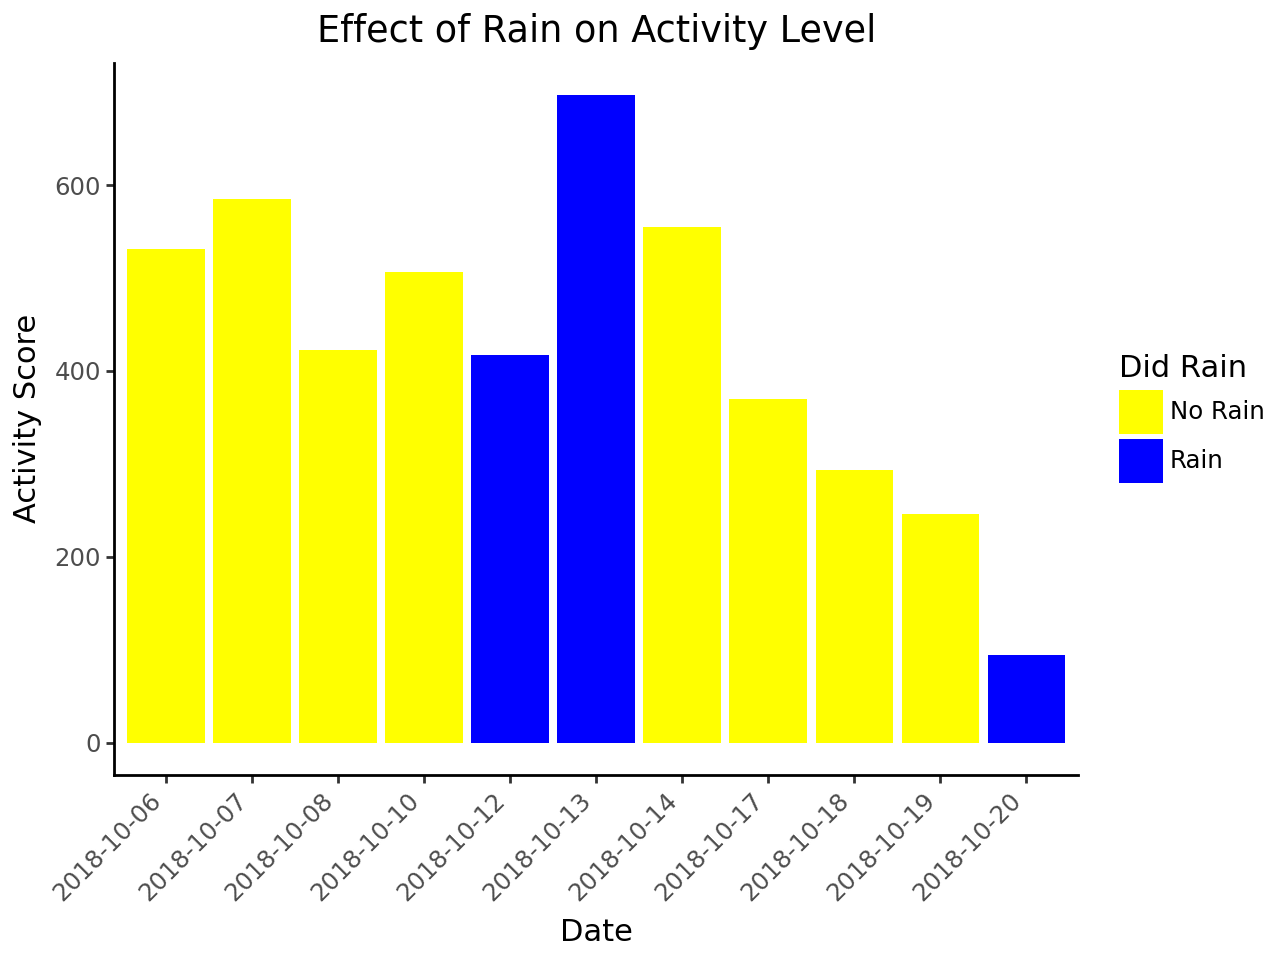

In [59]:
(
    ggplot(merged_df, aes(x='Date_str', y='Activity Score', fill='Did Rain'))
    + geom_col()
    + scale_fill_manual(values=['yellow', 'blue'], labels=['No Rain', 'Rain'])
    + theme_classic()
    + theme(axis_text_x=element_text(rotation=45, hjust=1))
    + labs(title="Effect of Rain on Activity Level", x="Date", y="Activity Score")
)

In [50]:
average_activity_per_day = merged_df.groupby('Date')['Activity Score'].mean().reset_index()

In [51]:
# Merge the average activity score back to the original DataFrame
merged_df = pd.merge(merged_df, average_activity_per_day, on='Date', suffixes=('', '_Avg'))

# Rename the columns for clarity
merged_df = merged_df.rename(columns={'Activity Score_Avg': 'Avg Activity Score'})

/usr/local/lib/python3.11/dist-packages/plotnine/layer.py:364: PlotnineWarning: geom_col : Removed 3012 rows containing missing values.


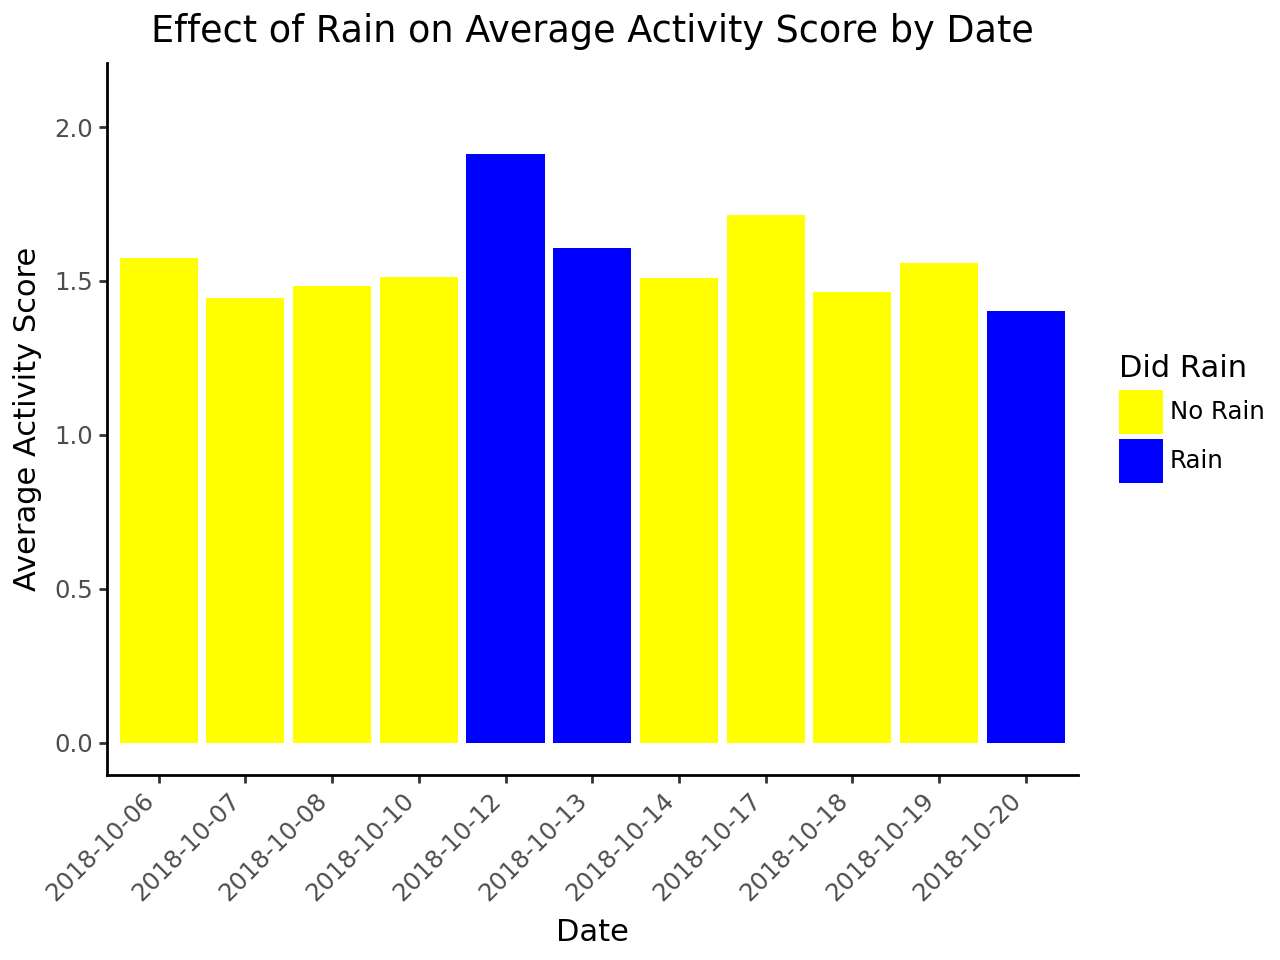

In [58]:
(
    ggplot(merged_df, aes(x='Date_str', y='Avg Activity Score', fill='Did Rain'))  # Use 'Avg Activity Score' here
    + geom_col()
    + scale_fill_manual(values=['yellow', 'blue'], labels=['No Rain', 'Rain'])
    + theme_classic()
    + theme(axis_text_x=element_text(rotation=45, hjust=1))
    + labs(title="Effect of Rain on Average Activity Score by Date", x="Date", y="Average Activity Score")  # Update y-axis label
    + scale_y_continuous(limits=(0, merged_df['Avg Activity Score'].max() * 1.1))  # Adjust y-axis limits
)

In [26]:
t_stat, p_value = stats.ttest_ind(Rain_Activity, No_Rain_Activity)
print(f"t-statistic: {t_stat}")
print(f"p-value: {p_value}")

t-statistic: 4.31040402360564
p-value: 1.6816439278263232e-05


In [54]:
y = merged_df['Avg Activity Score']
X = merged_df['Did Rain']
X = sm.add_constant(X)
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:     Avg Activity Score   R-squared:                       0.296
Model:                            OLS   Adj. R-squared:                  0.296
Method:                 Least Squares   F-statistic:                     1271.
Date:                Mon, 21 Apr 2025   Prob (F-statistic):          9.93e-233
Time:                        23:47:43   Log-Likelihood:                 2587.1
No. Observations:                3023   AIC:                            -5170.
Df Residuals:                    3021   BIC:                            -5158.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.5234      0.002    710.931      0.0

The p-value is signficant here since the value is < 0.05. This may indicate that rain affected what behaviors a squirrel showed. However, the R2 is low meaning the model is likely not a good fit.

# Run analysis on if precipitation affects the number of squirrels observed in a day.

In [28]:
merged_df['Unique Squirrel ID'].nunique()

3018

In [29]:
squirrel_counts = merged_df.groupby('Did Rain').agg(n_unq = ('Unique Squirrel ID', 'count')).reset_index()
print (squirrel_counts)

   Did Rain  n_unq
0         0   2304
1         1    719


In [30]:
Rain_Squirrel_Pop = squirrel_counts[squirrel_counts['Did Rain'] == 0]['n_unq']
No_Rain_Squirrel_Pop = squirrel_counts[squirrel_counts['Did Rain'] == 1]['n_unq']
print(Rain_Squirrel_Pop)
print(No_Rain_Squirrel_Pop)

0    2304
Name: n_unq, dtype: int64
1    719
Name: n_unq, dtype: int64


In [31]:
squirrel_counts_by_date = merged_df.groupby('Date')['Unique Squirrel ID'].nunique().reset_index(name='Squirrel Count')

In [32]:
squirrel_counts_by_date = pd.merge(
    squirrel_counts_by_date,
    merged_df[['Date', 'Did Rain']].drop_duplicates(),  # Ensure unique Date-Did Rain pairs
    on='Date',
    how='left'
)

In [33]:
squirrel_counts_by_date.groupby('Date')['Squirrel Count'].mean()

,Squirrel Count
Date,
2018-10-06,336.0
2018-10-07,405.0
2018-10-08,285.0
2018-10-10,332.0
2018-10-12,218.0
2018-10-13,434.0
2018-10-14,368.0
2018-10-17,216.0
2018-10-18,200.0


In [34]:
average_squirrel_counts = squirrel_counts_by_date.groupby('Did Rain')['Squirrel Count'].mean().reset_index()
print(average_squirrel_counts)

   Did Rain  Squirrel Count
0         0      287.375000
1         1      239.666667


In [35]:
squirrel_counts_by_date['Date_str'] = squirrel_counts_by_date['Date'].astype(str)
squirrel_counts_by_date['Did Rain'] = squirrel_counts_by_date['Did Rain'].astype('category')

In [36]:
t_stat, p_value = stats.ttest_ind(squirrel_counts_by_date['Squirrel Count'], squirrel_counts_by_date['Did Rain'])
print(f"t-statistic: {t_stat}")
print(f"p-value: {p_value}")

t-statistic: 8.052613471471046
p-value: 1.0532361957303587e-07


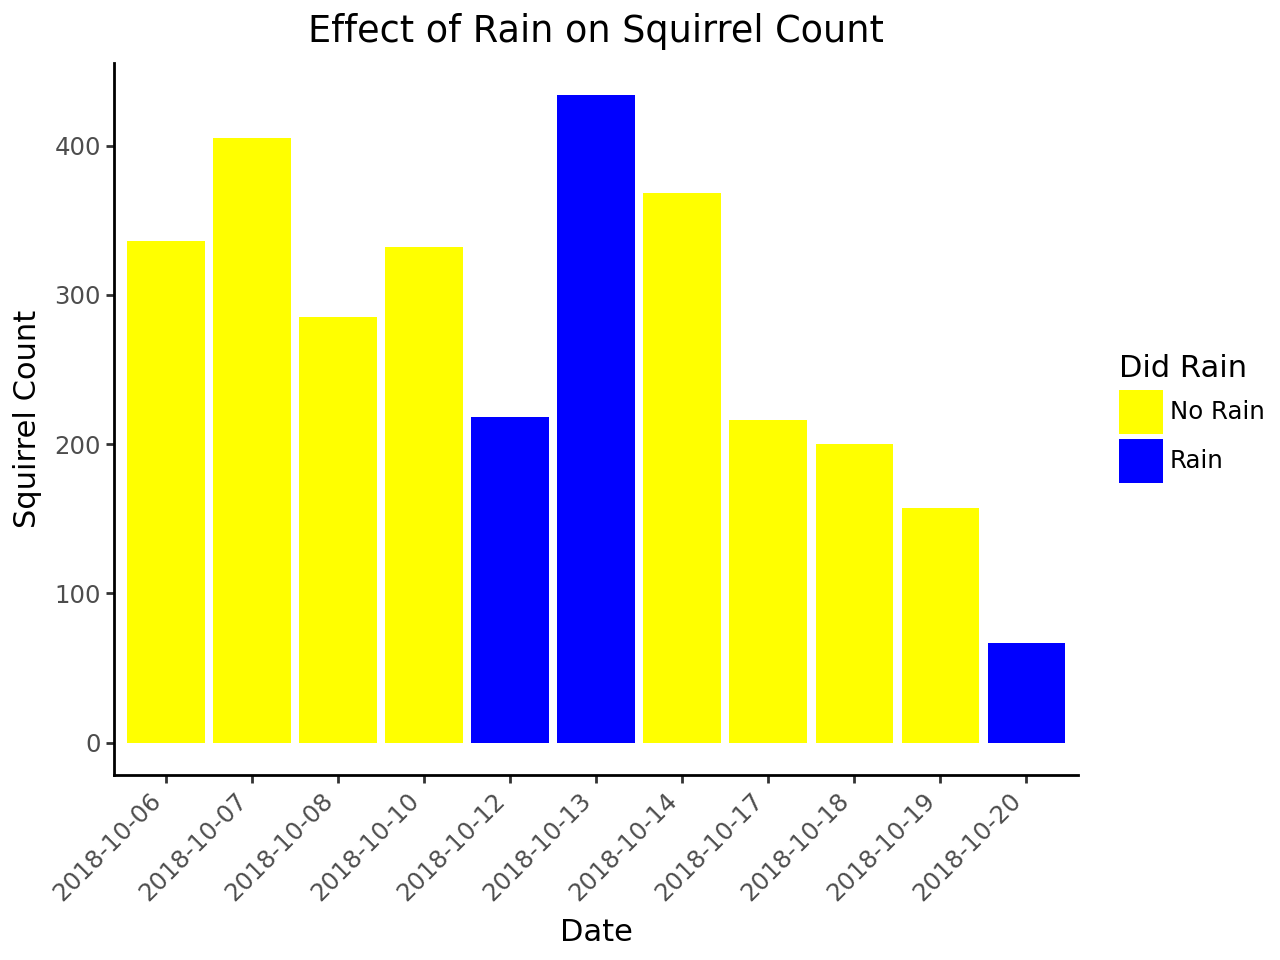

In [57]:
(
    ggplot(squirrel_counts_by_date, aes(x='Date_str', y='Squirrel Count', fill='Did Rain'))
    + geom_col()
    + scale_x_discrete(breaks=lambda x: x, labels=lambda x: [date[:10] for date in x])
    + scale_fill_manual(values=['yellow', 'blue'], labels=['No Rain', 'Rain'])  # Customize colors and labels
    + theme_classic()
    + theme(axis_text_x=element_text(rotation=45, hjust=1))  # Rotate x-axis labels
    + labs(title="Effect of Rain on Squirrel Count", x="Date", y="Squirrel Count")  #update labels
)

In [38]:
y = squirrel_counts_by_date['Squirrel Count']
X = squirrel_counts_by_date['Did Rain']
X = sm.add_constant(X)
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:         Squirrel Count   R-squared:                       0.039
Model:                            OLS   Adj. R-squared:                 -0.068
Method:                 Least Squares   F-statistic:                    0.3649
Date:                Mon, 21 Apr 2025   Prob (F-statistic):              0.561
Time:                        23:35:47   Log-Likelihood:                -66.856
No. Observations:                  11   AIC:                             137.7
Df Residuals:                       9   BIC:                             138.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        287.3750     41.243      6.968      0.0

/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:418: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=11 observations were given.


There is no significant effect on the squirrels viewed in a day depending on if it rained or not. The p-value is not significant. This may implicate that rain does not deter the squirrels from being out and about in the park. However, it is important to note that since the data was collected over 11 days this is an extremely small sample size and likely not conclusive of anything. This may be why the R2 value is so low.